In [4]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize': (18, 6)})

In [5]:
df = pd.read_csv('NPD.csv', sep = ',', engine='python')


In [6]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128974 entries, 0 to 128973
Data columns (total 34 columns):
Outlet             128974 non-null object
Brand              128974 non-null object
Model              128974 non-null object
SKU                128974 non-null object
Size               123670 non-null float64
Sub Res            128974 non-null object
HDR                128974 non-null object
Date               128974 non-null object
NPD ASP            128974 non-null int64
Price              128974 non-null int64
Units              128974 non-null int64
Dollars            128974 non-null int64
Stores             128974 non-null int64
%Distribution      128974 non-null float64
DistributionLVL    128974 non-null object
UHD Segment        128715 non-null object
Backlight          128974 non-null object
Year               128974 non-null int64
Week               128974 non-null int64
Brand-SKU          128974 non-null object
Date2              128974 non-null object
UnitsFilter 

In [7]:
# df2 = df['Outlet', 'BrandGroup', 'Model', 'Size', 'Sub Res', 'Year', 'Week', 'PriceBand', 'Price', 'Units', 'Stores', 'Dollars']


df2 = pd.DataFrame(df, columns =['Date','Outlet', 'BrandGroup', 'Brand','Model', 'Size', 'Sub Res', 'Year', 'Week', 'PriceBand', 'Price', 'Units', 'Stores', 'Dollars'])


# df2['UnitsPerStore'] = df2['Units']/df2['Stores']

df2.isnull().sum()

# df2.head()

df2['Units'] = df2['Units'].astype(int)

df2['Date'] = pd.to_datetime(df2['Date'])








In [8]:
df3 = df2.groupby(['Outlet', 'BrandGroup', 'Brand','Date','Year', 'Week', 'Size', 'Sub Res', 'PriceBand'])['Units', 'Dollars','Stores'].sum()

df3 = df3.reset_index()



df3.head()

# type(df3)
# df3['Date']
# pd.datetime.strptime(df3['Date'], '%m/%d/%Y')



,Outlet,BrandGroup,Brand,Date,Year,Week,Size,Sub Res,PriceBand,Units,Dollars,Stores
0,Remaining Retail,OPP,ELEMENT,2016-12-26,2016,52,19.0,HD,1-999,0,0,1
1,Remaining Retail,OPP,ELEMENT,2016-12-26,2016,52,24.0,HD,1-999,30,3863,40
2,Remaining Retail,OPP,ELEMENT,2016-12-26,2016,52,28.0,HD,1-999,1,177,1
3,Remaining Retail,OPP,ELEMENT,2016-12-26,2016,52,42.0,UHD,1-999,72,17941,28
4,Remaining Retail,OPP,ELEMENT,2016-12-26,2016,52,55.0,UHD,1-999,37,14569,28


In [9]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50947 entries, 0 to 50946
Data columns (total 12 columns):
Outlet        50947 non-null object
BrandGroup    50947 non-null object
Brand         50947 non-null object
Date          50947 non-null datetime64[ns]
Year          50947 non-null int64
Week          50947 non-null int64
Size          50947 non-null float64
Sub Res       50947 non-null object
PriceBand     50947 non-null object
Units         50947 non-null int64
Dollars       50947 non-null int64
Stores        50947 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 4.7+ MB


In [10]:
df3['UnitsPerStore'] = df3['Units']/df3['Stores']

def weeknum(week):
    if week < 10:
        return '0' +  str(week)
    else:
        return str(week)
df3.info()
 




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50947 entries, 0 to 50946
Data columns (total 13 columns):
Outlet           50947 non-null object
BrandGroup       50947 non-null object
Brand            50947 non-null object
Date             50947 non-null datetime64[ns]
Year             50947 non-null int64
Week             50947 non-null int64
Size             50947 non-null float64
Sub Res          50947 non-null object
PriceBand        50947 non-null object
Units            50947 non-null int64
Dollars          50947 non-null int64
Stores           50947 non-null int64
UnitsPerStore    50947 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 5.1+ MB


In [11]:
#Create Year Week String Key

df3['YearWk'] = df['Year'].astype(str) + df['Week'].apply(weeknum)
df3['YearWk'] = df3['YearWk'].astype(int)

In [12]:
df3['ASP'] = df3['Dollars']/df3['Units']
df3['ASP'].replace(np.nan, 0, inplace=True)


df3['Size'] = df3['Size'].astype(int)

df3['Units'] = df3['Units'].astype(int)
df3['Units'].replace(0, np.nan, inplace=True)

df3.dropna(axis=0, how='any', inplace=True)

df3['ASP'] = df3['ASP'].astype(int)

In [13]:
df3.head()

,Outlet,BrandGroup,Brand,Date,Year,Week,Size,Sub Res,PriceBand,Units,Dollars,Stores,UnitsPerStore,YearWk,ASP
1,Remaining Retail,OPP,ELEMENT,2016-12-26,2016,52,24,HD,1-999,30.0,3863,40,0.750000,201701,128
2,Remaining Retail,OPP,ELEMENT,2016-12-26,2016,52,28,HD,1-999,1.0,177,1,1.000000,201702,177
3,Remaining Retail,OPP,ELEMENT,2016-12-26,2016,52,42,UHD,1-999,72.0,17941,28,2.571429,201703,249
4,Remaining Retail,OPP,ELEMENT,2016-12-26,2016,52,55,UHD,1-999,37.0,14569,28,1.321429,201704,393
5,Remaining Retail,OPP,ELEMENT,2016-12-26,2016,52,65,UHD,1-999,7.0,4399,1,7.000000,201705,628


In [14]:
type(df3)

pandas.core.frame.DataFrame

In [15]:
df3.describe()

,Year,Week,Size,Units,Dollars,Stores,UnitsPerStore,YearWk,ASP
count,46962.000000,46962.000000,46962.000000,46962.000000,4.696200e+04,46962.000000,4.696200e+04,46962.000000,46962.000000
mean,2017.846642,24.698331,51.183233,575.692496,3.782237e+05,563.004557,NaN,201811.682978,1111.863677
std,0.793056,14.518902,17.164469,2138.449296,1.218440e+06,960.465519,NaN,77.615566,1791.156323
min,2016.000000,1.000000,10.000000,-94.000000,-1.330890e+05,0.000000,-inf,201652.000000,-32441.000000
25%,2017.000000,12.000000,40.000000,1.000000,3.600000e+02,1.000000,1.074787e-01,201735.000000,221.000000
50%,2018.000000,24.000000,50.000000,22.000000,9.758000e+03,28.000000,7.470498e-01,201818.000000,470.000000
75%,2018.000000,36.000000,65.000000,303.750000,2.341792e+05,898.000000,2.000000e+00,201901.000000,1400.000000
max,2019.000000,52.000000,98.000000,133401.000000,7.687775e+07,10651.000000,inf,201936.000000,37905.000000


In [16]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46962 entries, 1 to 50946
Data columns (total 15 columns):
Outlet           46962 non-null object
BrandGroup       46962 non-null object
Brand            46962 non-null object
Date             46962 non-null datetime64[ns]
Year             46962 non-null int64
Week             46962 non-null int64
Size             46962 non-null int64
Sub Res          46962 non-null object
PriceBand        46962 non-null object
Units            46962 non-null float64
Dollars          46962 non-null int64
Stores           46962 non-null int64
UnitsPerStore    46962 non-null float64
YearWk           46962 non-null int64
ASP              46962 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(7), object(5)
memory usage: 5.7+ MB


In [17]:
df4 = df3[df3['Year'] == 2019]

df4 = df4[df4['Size'] == 50]
df4 = df4[df4['Sub Res'] == 'UHD']

VZ = df4[df4['BrandGroup'] == 'VIZIO']
T1 = df4[df4['BrandGroup'] == 'T1']
TCL = df4[df4['BrandGroup'] == 'TCL']



In [18]:
type(df4['ASP'])

pandas.core.series.Series

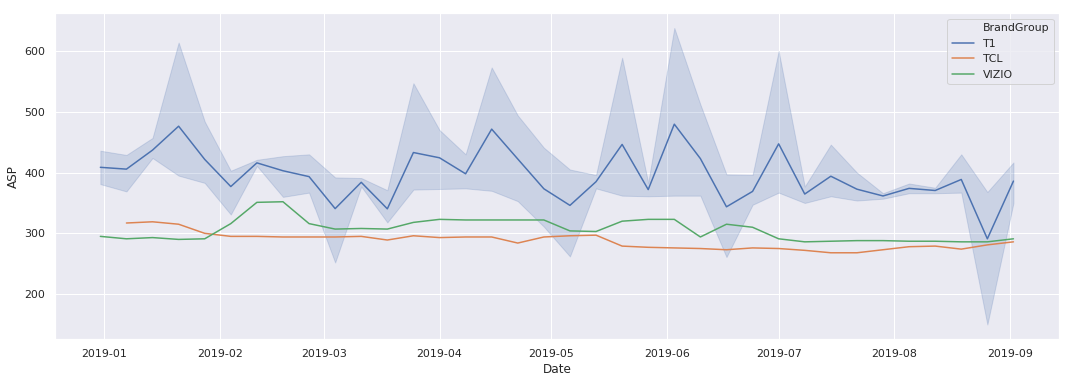

In [19]:
sns.set(style="darkgrid")

df4 = df4[df4['BrandGroup'] != 'Other']
df4 = df4[df4['BrandGroup'] != 'OPP']

sns.lineplot(x="Date", y="ASP",
             hue="BrandGroup",
             data=df4)

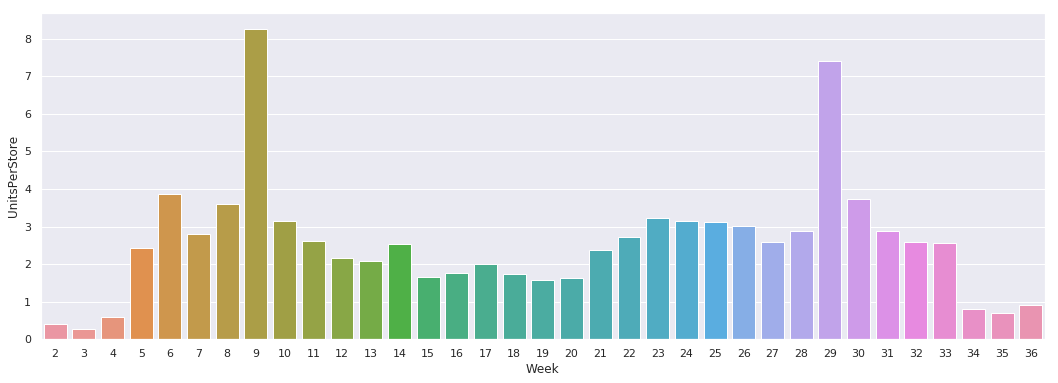

In [20]:
sns.barplot(x='Week', y='UnitsPerStore', data=TCL)

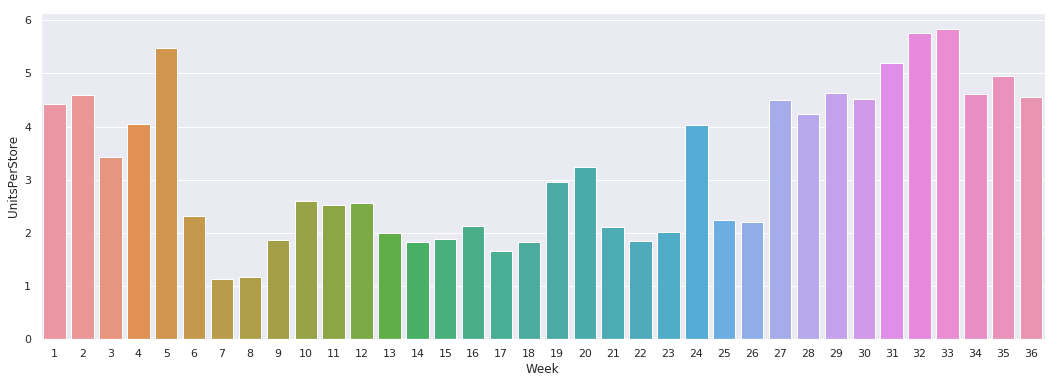

In [21]:
sns.barplot(x='Week', y='UnitsPerStore', data=VZ)

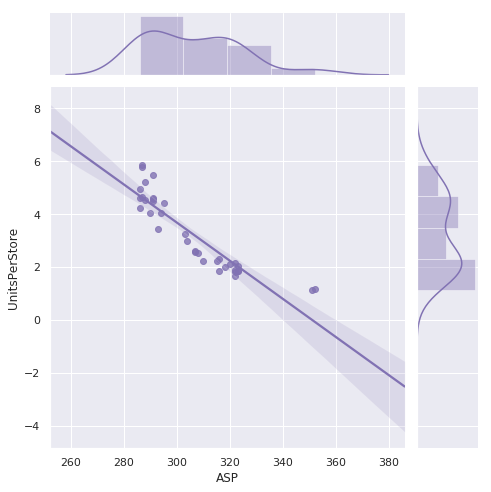

In [22]:
sns.set(style="darkgrid")


# g = sns.jointplot("ASP", "UnitsPerStore", data=VZ, kind="reg",
#                   xlim=(100, 160), ylim=(0, 5), color="m", height=7)

g = sns.jointplot("ASP", "UnitsPerStore", data=VZ, kind="reg",
                color="m", height=7)

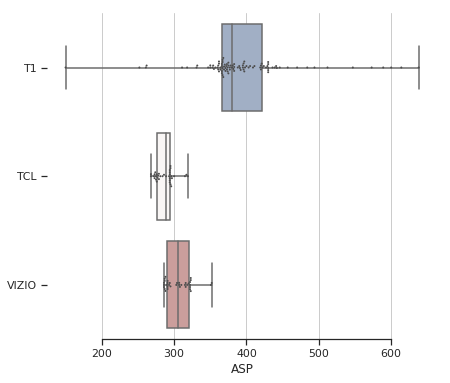

In [23]:
sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
# ax.set_xscale("log")



# Plot the orbital period with horizontal boxes
sns.boxplot(x="ASP", y="BrandGroup", data=df4,
            whis="range", palette="vlag")

# Add in points to show each observation
sns.swarmplot(x="ASP", y="BrandGroup", data=df4,
              size=2, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

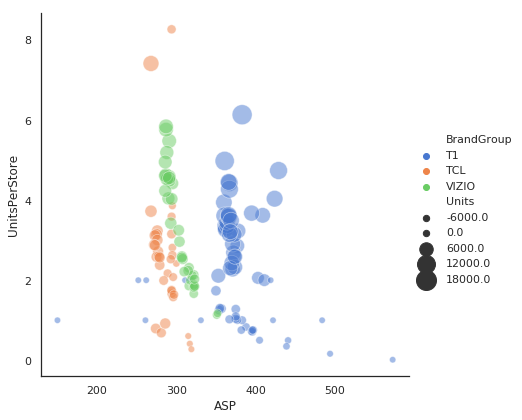

In [24]:
sns.set(style="white")


# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="ASP", y="UnitsPerStore", hue="BrandGroup", size="Units",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df4)

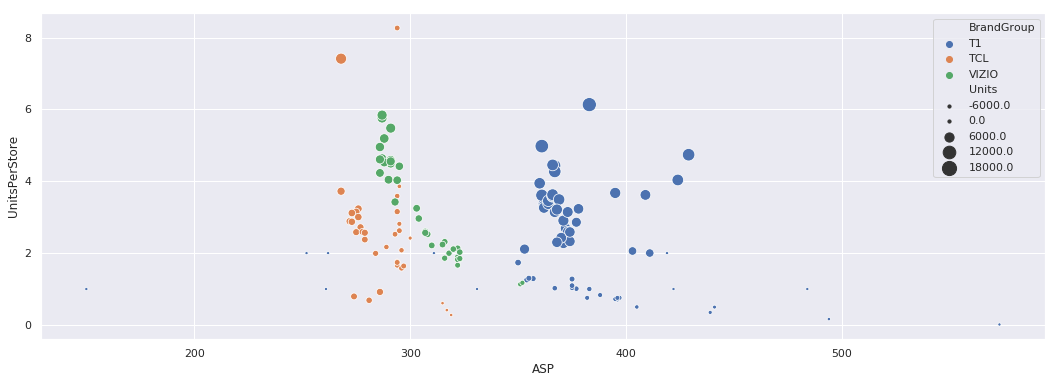

In [25]:
sns.set()


cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="ASP", y="UnitsPerStore",
                     hue="BrandGroup", size="Units", sizes=(10, 200),
                     data=df4)

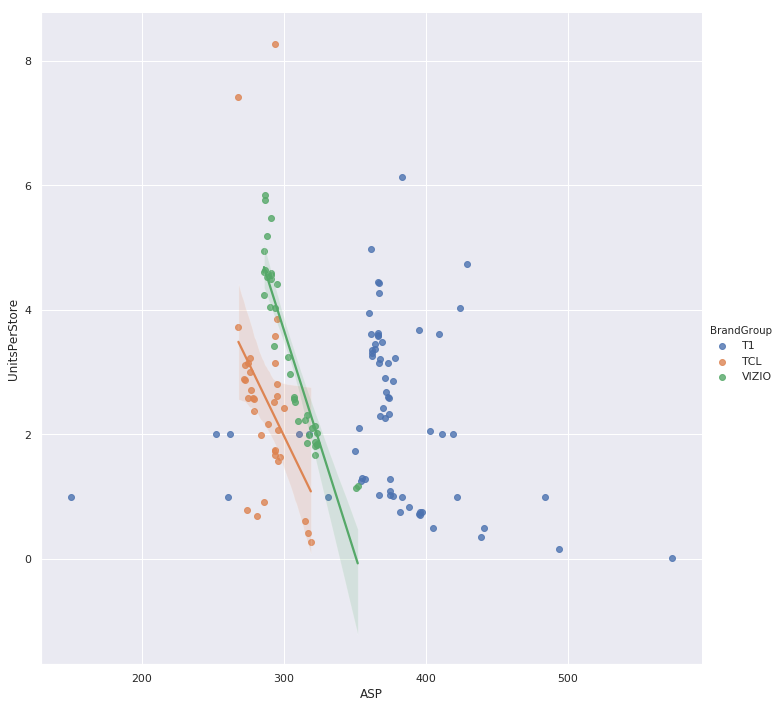

In [26]:
sns.set()

# Plot sepal with as a function of sepal_length across days
g = sns.lmplot(x="ASP", y="UnitsPerStore", hue="BrandGroup",
               truncate=True, height=10, data=df4)

# Use more informative axis labels than are provided by default
# g.set_axis_labels("Sepal length (mm)", "Sepal width (mm)")

/usr/local/lib/python3.6/site-packages/matplotlib/contour.py:1540: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/usr/local/lib/python3.6/site-packages/matplotlib/contour.py:1541: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


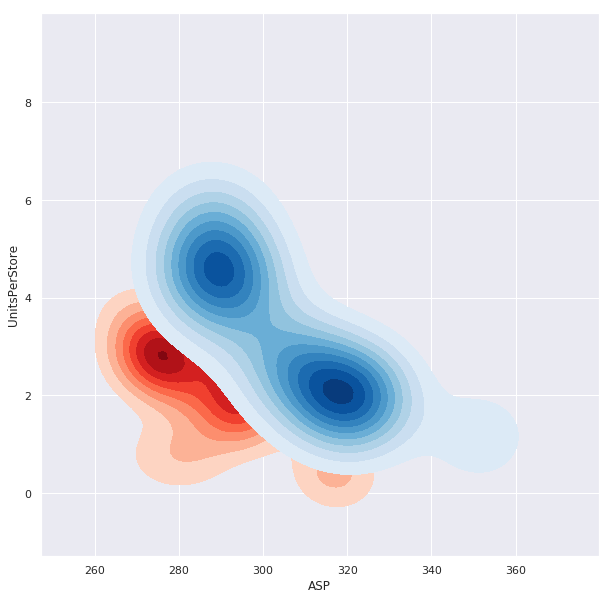

In [27]:
sns.set(style="darkgrid")


# Subset the iris dataset by species
TCL = df4.query("Brand == 'TCL'")
VZ = df4.query("Brand == 'VIZIO'")

# Set up the figure
f, ax = plt.subplots(figsize=(10, 10))
# ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(TCL.ASP, TCL.UnitsPerStore,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(VZ.ASP, VZ.UnitsPerStore,
                 cmap="Blues", shade=True, shade_lowest=False)
ax = sns.kdeplot(T1.ASP, T1.UnitsPerStore,
                 cmap="Greens", shade=True, shade_lowest=False)

# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
green = sns.color_palette("Greens")[-2]
# ax.text(2.5, 8.2, "TCL", size=16, color=blue)
# ax.text(3.8, 4.5, "VZ", size=16, color=red)

In [28]:
ax.text?

Signature: ax.text(x, y, s, fontdict=None, withdash=False, **kwargs)
Docstring:
Add text to the axes.

Add the text *s* to the axes at location *x*, *y* in data coordinates.

Parameters
----------
x, y : scalars
    The position to place the text. By default, this is in data
    coordinates. The coordinate system can be changed using the
    *transform* parameter.

s : str
    The text.

fontdict : dictionary, optional, default: None
    A dictionary to override the default text properties. If fontdict
    is None, the defaults are determined by your rc parameters.

withdash : boolean, optional, default: False
    Creates a `~matplotlib.text.TextWithDash` instance instead of a
    `~matplotlib.text.Text` instance.

Returns
-------
text : `.Text`
    The created `.Text` instance.

Other Parameters
----------------
**kwargs : `~matplotlib.text.Text` properties.
    Other miscellaneous text parameters.

Examples
--------
Individual keyword arguments can be used to override any given
param